In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from plotly import graph_objs as go

In [12]:
file='indeed_job_dataset.csv'

In [13]:
indeed_df=pd.read_csv(file,sep=',')
indeed_df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [14]:
# get the count of skills by job type 
group_indeed=indeed_df.groupby('Job_Type')
s=['python','sql','machine learning','r','hadoop','tableau','sas','spark','java']
s_0=group_indeed[s[0]].value_counts()
s_1=group_indeed[s[1]].value_counts()
s_2=group_indeed[s[2]].value_counts()
s_3=group_indeed[s[3]].value_counts()
s_4=group_indeed[s[4]].value_counts()
s_5=group_indeed[s[5]].value_counts()
s_6=group_indeed[s[6]].value_counts()
s_7=group_indeed[s[7]].value_counts()
s_8=group_indeed[s[8]].value_counts()

# put all info in a dataframe
skills_df=pd.DataFrame({'python':s_0,
                       'sql':s_1,
                       'machine learning':s_2,
                       'r':s_3,
                       'hadoop':s_4,
                       'tableau':s_5,
                       'sas':s_6,
                       'spark':s_7,
                       'java':s_8})
new_skills_df=skills_df.reset_index(inplace=False,drop=False)
new_skills_df

,level_0,level_1,python,sql,machine learning,r,hadoop,tableau,sas,spark,java
0,data_analyst,0,1281,749,1627,1337,1667,1255,1483,1726,1692
1,data_analyst,1,512,1044,166,456,126,538,310,67,101
2,data_engineer,0,478,512,1090,1151,618,1165,1312,660,675
3,data_engineer,1,901,867,289,228,761,214,67,719,704
4,data_scientist,0,631,1350,701,993,1716,2059,1979,1798,1868
5,data_scientist,1,1912,1193,1842,1550,827,484,564,745,675


In [15]:
# get the count of jobs for each type
job_count=group_indeed['Job_Title'].count()
job_count

Job_Type
data_analyst      1793
data_engineer     1379
data_scientist    2543
Name: Job_Title, dtype: int64

In [16]:
# insert a job count column
skill_count=new_skills_df[new_skills_df['level_1']==1]
skill_count_new=skill_count.rename(columns={'level_0':'Job Type '})
skill_count_df=skill_count_new.drop(['level_1'], axis=1)
skill_count_df['Job Count']=[1793,1379,2543]
skill_count_df

,Job Type,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Job Count
1,data_analyst,512,1044,166,456,126,538,310,67,101,1793
3,data_engineer,901,867,289,228,761,214,67,719,704,1379
5,data_scientist,1912,1193,1842,1550,827,484,564,745,675,2543


In [17]:
# calculate the percentage of each skill count in each job type
skill_count_df['python_pct']=skill_count_df['python']/skill_count_df['Job Count']*100
skill_count_df['sql_pct']=skill_count_df['sql']/skill_count_df['Job Count']*100
skill_count_df['ML_pct']=skill_count_df['machine learning']/skill_count_df['Job Count']*100
skill_count_df['r_pct']=skill_count_df['r']/skill_count_df['Job Count']*100
skill_count_df['hadoop_pct']=skill_count_df['hadoop']/skill_count_df['Job Count']*100
skill_count_df['tableau_pct']=skill_count_df['tableau']/skill_count_df['Job Count']*100
skill_count_df['sas_pct']=skill_count_df['sas']/skill_count_df['Job Count']*100
skill_count_df['spark_pct']=skill_count_df['spark']/skill_count_df['Job Count']*100
skill_count_df['java_pct']=skill_count_df['java']/skill_count_df['Job Count']*100
skill_count_df

,Job Type,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Job Count,python_pct,sql_pct,ML_pct,r_pct,hadoop_pct,tableau_pct,sas_pct,spark_pct,java_pct
1,data_analyst,512,1044,166,456,126,538,310,67,101,1793,28.555494,58.226436,9.258226,25.432236,7.027328,30.005577,17.289459,3.736754,5.633017
3,data_engineer,901,867,289,228,761,214,67,719,704,1379,65.337201,62.871646,20.957215,16.533720,55.184917,15.518492,4.858593,52.139231,51.051487
5,data_scientist,1912,1193,1842,1550,827,484,564,745,675,2543,75.186787,46.913095,72.434133,60.951632,32.520645,19.032639,22.178529,29.296107,26.543453


In [18]:
# make bar plot for skills vs job type
pos=list(range(len(skill_count_df['python'])))
width=0.05

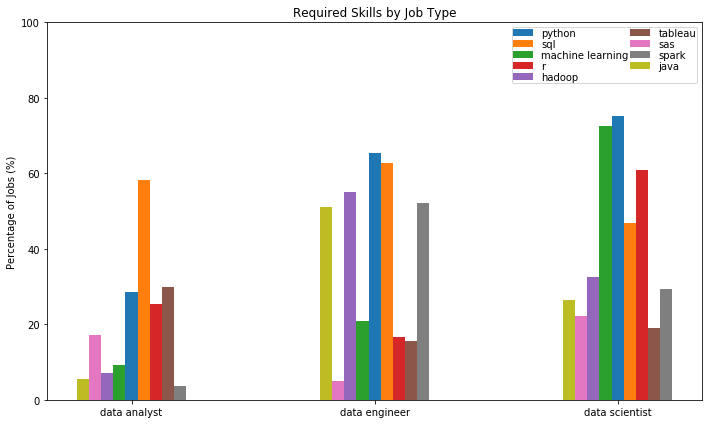

In [19]:
plt.figure(figsize=(10,6))
plt.bar(pos,skill_count_df['python_pct'],width,label='python')
plt.bar([p+width for p in pos],skill_count_df['sql_pct'],width,label='sql')
plt.bar([p-width for p in pos],skill_count_df['ML_pct'],width,label='machine learning')
plt.bar([p+2*width for p in pos],skill_count_df['r_pct'],width,label='r')
plt.bar([p-2*width for p in pos],skill_count_df['hadoop_pct'],width,label='hadoop')
plt.bar([p+3*width for p in pos],skill_count_df['tableau_pct'],width,label='tableau')
plt.bar([p-3*width for p in pos],skill_count_df['sas_pct'],width,label='sas')
plt.bar([p+4*width for p in pos],skill_count_df['spark_pct'],width,label='spark')
plt.bar([p-4*width for p in pos],skill_count_df['java_pct'],width,label='java')
plt.xticks(pos,['data analyst','data engineer','data scientist'])
plt.legend(ncol=2,borderpad=0.1,labelspacing=0.1,columnspacing=0.2)

plt.ylabel('Percentage of Jobs (%)')
plt.ylim(0,100)
plt.title('Required Skills by Job Type')
plt.tight_layout()
#plt.savefig('skills_by_job_type',dpi=1000)
plt.show()

In [20]:
# get the count of skills by salary 
s_indeed=indeed_df.groupby('Queried_Salary')
sk=['python','sql','machine learning','r','hadoop','tableau','sas','spark','java']
sk_0=s_indeed[sk[0]].sum()
sk_1=s_indeed[sk[1]].sum()
sk_2=s_indeed[sk[2]].sum()
sk_3=s_indeed[sk[3]].sum()
sk_4=s_indeed[sk[4]].sum()
sk_5=s_indeed[sk[5]].sum()
sk_6=s_indeed[sk[6]].sum()
sk_7=s_indeed[sk[7]].sum()
sk_8=s_indeed[sk[8]].sum()

job_count_salary=s_indeed['Job_Title'].count()

salary_df=pd.DataFrame({'python':sk_0,
                       'sql':sk_1,
                       'machine learning':sk_2,
                       'r':sk_3,
                       'hadoop':sk_4,
                       'tableau':sk_5,
                       'sas':sk_6,
                       'spark':sk_7,
                       'java':sk_8,
                       'Job Count':job_count_salary})
salary_df.reset_index(inplace=True,drop=False)
# the salary column is text, make another column to indicate its order
salary_df['order']=[3,4,5,2,1,6]
s_s_df=salary_df.sort_values(['order'])
s_s_df

,Queried_Salary,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Job Count,order
4,<80000,144,367,67,148,12,162,131,9,34,788,1
3,80000-99999,412,618,201,311,97,283,156,71,102,953,2
0,100000-119999,861,840,579,648,410,357,288,347,375,1394,3
1,120000-139999,957,720,687,601,593,253,189,536,474,1292,4
2,140000-159999,674,388,533,376,424,138,124,397,359,873,5
5,>160000,277,171,230,150,178,43,53,171,136,415,6


In [21]:
# calculate the percentage of each skill count in salary category
s_s_df['python_pct']=s_s_df['python']/s_s_df['Job Count']*100
s_s_df['sql_pct']=s_s_df['sql']/s_s_df['Job Count']*100
s_s_df['ML_pct']= s_s_df['machine learning']/s_s_df['Job Count']*100
s_s_df['r_pct']=s_s_df['r']/s_s_df['Job Count']*100
s_s_df['hadoop_pct']=s_s_df['hadoop']/s_s_df['Job Count']*100
s_s_df['tableau_pct']=s_s_df['tableau']/s_s_df['Job Count']*100
s_s_df['sas_pct']=s_s_df['sas']/s_s_df['Job Count']*100
s_s_df['spark_pct']=s_s_df['spark']/s_s_df['Job Count']*100
s_s_df['java_pct']=s_s_df['java']/s_s_df['Job Count']*100
s_s_df

,Queried_Salary,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,...,order,python_pct,sql_pct,ML_pct,r_pct,hadoop_pct,tableau_pct,sas_pct,spark_pct,java_pct
4,<80000,144,367,67,148,12,162,131,9,34,...,1,18.274112,46.573604,8.502538,18.781726,1.522843,20.558376,16.624365,1.142132,4.314721
3,80000-99999,412,618,201,311,97,283,156,71,102,...,2,43.231899,64.847849,21.091291,32.633788,10.178384,29.695698,16.369360,7.450157,10.703043
0,100000-119999,861,840,579,648,410,357,288,347,375,...,3,61.764706,60.258250,41.535151,46.484935,29.411765,25.609756,20.659971,24.892396,26.901004
1,120000-139999,957,720,687,601,593,253,189,536,474,...,4,74.071207,55.727554,53.173375,46.517028,45.897833,19.582043,14.628483,41.486068,36.687307
2,140000-159999,674,388,533,376,424,138,124,397,359,...,5,77.205040,44.444444,61.053837,43.069874,48.568156,15.807560,14.203895,45.475372,41.122566
5,>160000,277,171,230,150,178,43,53,171,136,...,6,66.746988,41.204819,55.421687,36.144578,42.891566,10.361446,12.771084,41.204819,32.771084


In [22]:
# make a bar plot for skill vs salary
# This is a overview. Did not use this one. Two line plots were created based on this in order to show trends.
pos=list(range(len(s_s_df['Queried_Salary'])))
width=0.05

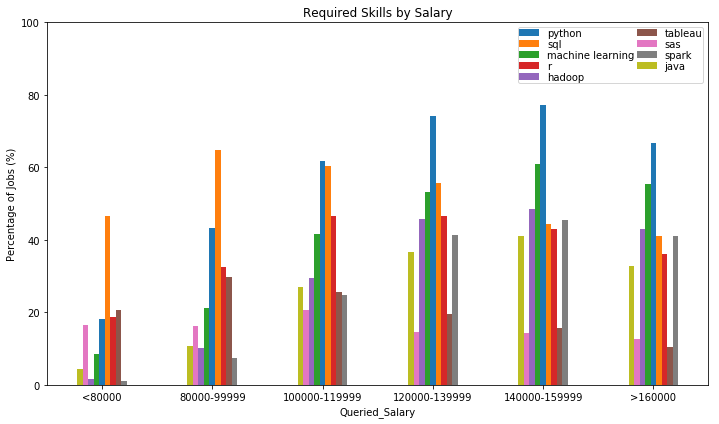

In [23]:
plt.figure(figsize=(10,6))
plt.bar(pos,s_s_df['python_pct'],width,label='python')
plt.bar([p+width for p in pos],s_s_df['sql_pct'],width,label='sql')
plt.bar([p-width for p in pos],s_s_df['ML_pct'],width,label='machine learning')
plt.bar([p+2*width for p in pos],s_s_df['r_pct'],width,label='r')
plt.bar([p-2*width for p in pos],s_s_df['hadoop_pct'],width,label='hadoop')
plt.bar([p+3*width for p in pos],s_s_df['tableau_pct'],width,label='tableau')
plt.bar([p-3*width for p in pos],s_s_df['sas_pct'],width,label='sas')
plt.bar([p+4*width for p in pos],s_s_df['spark_pct'],width,label='spark')
plt.bar([p-4*width for p in pos],s_s_df['java_pct'],width,label='java')
plt.xticks(pos,s_s_df['Queried_Salary'])
plt.legend(ncol=2,borderpad=0.1,labelspacing=0.1,columnspacing=0.2)
plt.xlabel('Queried_Salary')
plt.ylabel('Percentage of Jobs (%)')
plt.title('Required Skills by Salary')
plt.tight_layout()
plt.ylim(0,100)
#plt.savefig('Required Skills by Salary',dpi=1000)
plt.show()

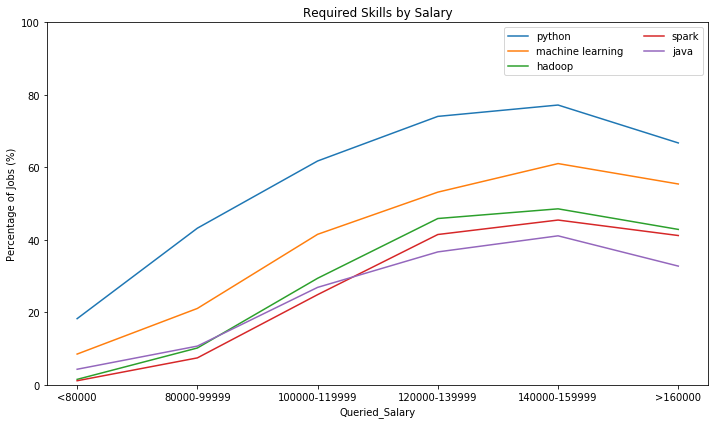

In [24]:
# make a line plot to see the trend
# skills in a upward trend
pos=list(range(len(s_s_df['Queried_Salary'])))
plt.figure(figsize=(10,6))
plt.plot(pos,s_s_df['python_pct'],label='python')
#plt.plot(pos,s_s_df['sql_pct'],label='sql')
plt.plot(pos,s_s_df['ML_pct'],label='machine learning')
#plt.plot(pos,s_s_df['r_pct'],label='r')
plt.plot(pos,s_s_df['hadoop_pct'],label='hadoop')
#plt.plot(pos,s_s_df['tableau_pct'],label='tableau')
#plt.plot(pos,s_s_df['sas_pct'],label='sas')
plt.plot(pos,s_s_df['spark_pct'],label='spark')
plt.plot(pos,s_s_df['java_pct'],label='java')
plt.xticks(pos,s_s_df['Queried_Salary'])
plt.legend(ncol=2)
plt.xlabel('Queried_Salary')
plt.ylabel('Percentage of Jobs (%)')
plt.title('Required Skills by Salary')
plt.tight_layout()
plt.ylim(0,100)
#plt.savefig('Required Skills by Salary (upward)',dpi=1000)
plt.show()

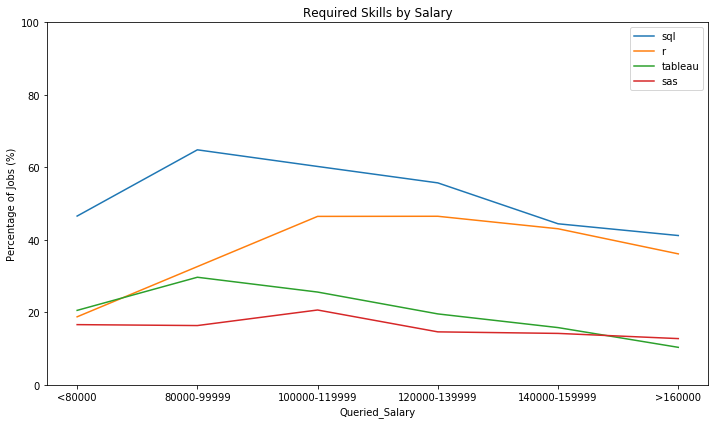

In [25]:
# skills that are steady across all salary category
pos=list(range(len(s_s_df['Queried_Salary'])))
plt.figure(figsize=(10,6))
#plt.plot(pos,s_s_df['python_pct'],label='python')
plt.plot(pos,s_s_df['sql_pct'],label='sql')
#plt.plot(pos,s_s_df['ML_pct'],label='machine learning')
plt.plot(pos,s_s_df['r_pct'],label='r')
#plt.plot(pos,s_s_df['hadoop_pct'],label='hadoop')
plt.plot(pos,s_s_df['tableau_pct'],label='tableau')
plt.plot(pos,s_s_df['sas_pct'],label='sas')
#plt.plot(pos,s_s_df['spark_pct'],label='spark')
#plt.plot(pos,s_s_df['java_pct'],label='java')
plt.xticks(pos,s_s_df['Queried_Salary'])
plt.legend()
plt.xlabel('Queried_Salary')
plt.ylabel('Percentage of Jobs (%)')
plt.title('Required Skills by Salary')
plt.tight_layout()
plt.ylim(0,100)
#plt.savefig('Required Skills by Salary (stable)',dpi=1000)
plt.show()

In [26]:
# statistical analysis for skill vs job type
# calculate the expected count for each skill in each job type, expected= (total number of jobs require a skill/total number of jobs)*the number of jobs that reqires that skill in each job type
skill_count_df['python_exp']=round((skill_count_df['python'].sum()/skill_count_df['Job Count'].sum())*skill_count_df['Job Count'])
skill_count_df['sql_exp']=round((skill_count_df['sql'].sum()/skill_count_df['Job Count'].sum())*skill_count_df['Job Count'])
skill_count_df['machine learning_exp']=round((skill_count_df['machine learning'].sum()/skill_count_df['Job Count'].sum())*skill_count_df['Job Count'])
skill_count_df['r_exp']=round((skill_count_df['r'].sum()/skill_count_df['Job Count'].sum())*skill_count_df['Job Count'])
skill_count_df['hadoop_exp']=round((skill_count_df['hadoop'].sum()/skill_count_df['Job Count'].sum())*skill_count_df['Job Count'])
skill_count_df['tableau_exp']=round((skill_count_df['tableau'].sum()/skill_count_df['Job Count'].sum())*skill_count_df['Job Count'])
skill_count_df['sas_exp']=round((skill_count_df['sas'].sum()/skill_count_df['Job Count'].sum())*skill_count_df['Job Count'])
skill_count_df['spark_exp']=round((skill_count_df['spark'].sum()/skill_count_df['Job Count'].sum())*skill_count_df['Job Count'])
skill_count_df['java_exp']=round((skill_count_df['java'].sum()/skill_count_df['Job Count'].sum())*skill_count_df['Job Count'])

skill_count_df

,Job Type,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,...,java_pct,python_exp,sql_exp,machine learning_exp,r_exp,hadoop_exp,tableau_exp,sas_exp,spark_exp,java_exp
1,data_analyst,512,1044,166,456,126,538,310,67,101,...,5.633017,1043.0,974.0,721.0,701.0,538.0,388.0,295.0,480.0,464.0
3,data_engineer,901,867,289,228,761,214,67,719,704,...,51.051487,802.0,749.0,554.0,539.0,414.0,298.0,227.0,369.0,357.0
5,data_scientist,1912,1193,1842,1550,827,484,564,745,675,...,26.543453,1480.0,1381.0,1022.0,994.0,763.0,550.0,419.0,681.0,659.0


In [27]:
# perform chi-square test, stroe p value in a list and put into a summary table
p_by_job_type=[]
for skill in s:
    _,p=stats.chisquare(skill_count_df[skill],skill_count_df[f'{skill}_exp'])
    p_by_job_type.append(p)
print(p_by_job_type)
job_type_summary=pd.DataFrame({'Skills':s,'P value':p_by_job_type})
job_type_summary


[1.827247761576756e-89, 2.057416921466691e-11, 6.890286085372974e-264, 8.070728876767436e-126, 1.4674576254799885e-133, 3.5181325545601645e-20, 2.813821181524323e-36, 2.7671152178562123e-151, 1.0224901215683531e-135]


,Skills,P value
0,python,1.827248e-89
1,sql,2.057417e-11
2,machine learning,6.890286e-264
3,r,8.070729e-126
4,hadoop,1.467458e-133
5,tableau,3.518133e-20
6,sas,2.813821e-36
7,spark,2.767115e-151
8,java,1.022490e-135


In [28]:
# statistical analysis for skill vs salary
# calculate the expected count for each skill in each salary category, expected= (total number of jobs requiring one skill /total number of jobs)*the number of jobs requiring that skill in one category
s_s_df['python_exp']=round((s_s_df['python'].sum()/s_s_df['Job Count'].sum())*s_s_df['Job Count'])
s_s_df['sql_exp']=round((s_s_df['sql'].sum()/s_s_df['Job Count'].sum())*s_s_df['Job Count'])
s_s_df['machine learning_exp']=round((s_s_df['machine learning'].sum()/s_s_df['Job Count'].sum())*s_s_df['Job Count'])
s_s_df['r_exp']=round((s_s_df['r'].sum()/s_s_df['Job Count'].sum())*s_s_df['Job Count'])
s_s_df['hadoop_exp']=round((s_s_df['hadoop'].sum()/s_s_df['Job Count'].sum())*s_s_df['Job Count'])
s_s_df['tableau_exp']=round((s_s_df['tableau'].sum()/s_s_df['Job Count'].sum())*s_s_df['Job Count'])
s_s_df['sas_exp']=round((s_s_df['sas'].sum()/s_s_df['Job Count'].sum())*s_s_df['Job Count'])
s_s_df['spark_exp']=round((s_s_df['spark'].sum()/s_s_df['Job Count'].sum())*s_s_df['Job Count'])
s_s_df['java_exp']=round((s_s_df['java'].sum()/s_s_df['Job Count'].sum())*s_s_df['Job Count'])

s_s_df


,Queried_Salary,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,...,java_pct,python_exp,sql_exp,machine learning_exp,r_exp,hadoop_exp,tableau_exp,sas_exp,spark_exp,java_exp
4,<80000,144,367,67,148,12,162,131,9,34,...,4.314721,458.0,428.0,317.0,308.0,236.0,170.0,130.0,211.0,204.0
3,80000-99999,412,618,201,311,97,283,156,71,102,...,10.703043,554.0,518.0,383.0,373.0,286.0,206.0,157.0,255.0,247.0
0,100000-119999,861,840,579,648,410,357,288,347,375,...,26.901004,811.0,757.0,560.0,545.0,418.0,301.0,230.0,373.0,361.0
1,120000-139999,957,720,687,601,593,253,189,536,474,...,36.687307,752.0,702.0,519.0,505.0,387.0,279.0,213.0,346.0,335.0
2,140000-159999,674,388,533,376,424,138,124,397,359,...,41.122566,508.0,474.0,351.0,341.0,262.0,189.0,144.0,234.0,226.0
5,>160000,277,171,230,150,178,43,53,171,136,...,32.771084,241.0,225.0,167.0,162.0,124.0,90.0,68.0,111.0,107.0


In [29]:
# perform chi-square test, stroe p value in a list and put into a summary table
p_by_salary=[]
for skill in s:
    _,p=stats.chisquare(s_s_df[skill],s_s_df[f'{skill}_exp'])
    p_by_salary.append(p)
print(p_by_salary)
salary_summary=pd.DataFrame({'Skills':s,'P value':p_by_salary})
salary_summary


[7.585365659301768e-78, 6.549542956623711e-13, 1.6685783608444037e-96, 1.5258340352463121e-27, 3.7242933043795e-121, 7.241899747686586e-16, 0.00027917364204818894, 9.986001668745679e-123, 4.915780299119208e-78]


,Skills,P value
0,python,7.585366e-78
1,sql,6.549543e-13
2,machine learning,1.668578e-96
3,r,1.525834e-27
4,hadoop,3.724293e-121
5,tableau,7.241900e-16
6,sas,2.791736e-04
7,spark,9.986002e-123
8,java,4.915780e-78


In [30]:
DA_df=indeed_df[indeed_df['Job_Type']=='data_analyst']
DA_df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
2543,2543,Data Analyst,https://www.indeed.com/rc/clk?jk=22115e90f6e9b...,<80000,data_analyst,['Tableau'],1,Ace Technologies,16.0,4.1,...,0,0,0,1,0,1,0,0,0,0
2544,2544,Junior Data Analyst,https://www.indeed.com/rc/clk?jk=9328316a5667c...,<80000,data_analyst,['SQL'],1,ThirdLove,47.0,4.0,...,0,0,0,0,0,0,0,0,0,1
2545,2545,Data Analyst,https://www.indeed.com/rc/clk?jk=da18944a61734...,<80000,data_analyst,"['Time Management', 'SQL']",2,Optimove,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2546,2546,Data Analyst,https://www.indeed.com/rc/clk?jk=301b9ef4ad39f...,<80000,data_analyst,['SQL'],1,Commonwealth of Massachusetts,353.0,3.9,...,0,0,0,0,0,0,0,0,0,1
2547,2547,Data Analyst,https://www.indeed.com/rc/clk?jk=f910c21d0e325...,<80000,data_analyst,['Tableau'],1,Ace Technologies,16.0,4.1,...,0,0,0,1,0,1,0,0,0,0


In [31]:
# make a Choropleth Map to show the distibution of data analyst jobs by states
state_df=DA_df.groupby(['Location'])
count_by_state=state_df['Job_Title'].count()
DA_State=pd.DataFrame({'Data Analyst Job Count':count_by_state})
DA_State.reset_index(inplace=True,drop=False)
DA_State['percentage']=round((DA_State['Data Analyst Job Count']/DA_State['Data Analyst Job Count'].sum())*100,4)
DA_State

,Location,Data Analyst Job Count,percentage
0,AL,6,0.3350
1,AR,8,0.4467
2,AZ,15,0.8375
3,CA,376,20.9939
4,CO,25,1.3959
5,CT,29,1.6192
6,DC,48,2.6801
7,DE,6,0.3350
8,FL,44,2.4567
9,GA,59,3.2942


In [32]:
fig = go.Figure(data=go.Choropleth(
    locations=DA_State['Location'], # Spatial coordinates
    z = DA_State['percentage'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Percentage of Jobs",
))

fig.update_layout(
    title_text = 'Percentage of Data Analyst Jobs by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

ValueError: 
    Invalid value of type 'plotly.graph_objs.Choropleth' received for the 'data' property of 
        Received value: Choropleth({
    'colorbar': {'title': {'text': 'Percentage of Jobs'}},
    'colorscale': 'Reds',
    'locationmode': 'USA-states',
    'locations': array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA',
                        'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
                        'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
                        'REMOTE', 'RI', 'SC', 'SD', 'TN', 'TX', 'USA', 'UT', 'VA', 'VT', 'WA',
                        'WI', 'WV', 'WY'], dtype=object),
    'z': array([ 0.335 ,  0.4467,  0.8375, 20.9939,  1.3959,  1.6192,  2.6801,  0.335 ,
                 2.4567,  3.2942,  0.1117,  0.5583,  0.0558,  3.6851,  1.1167,  0.0558,
                 0.335 ,  0.0558,  4.8018,  3.0709,  0.335 ,  2.1776,  1.5075,  2.0659,
                 2.5684,  0.0558,  0.1117,  3.0151,  0.1117,  0.3908, 12.842 ,  1.8425,
                 0.1117,  1.4517,  3.1267,  0.2233,  0.1117,  0.8375,  0.0558,  1.1725,
                 6.5327,  1.34  ,  0.9492,  4.746 ,  0.1117,  3.1826,  0.6142,  0.1117,
                 0.0558])
})

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth', 'cone',
                     'contour', 'contourcarpet', 'funnel',
                     'funnelarea', 'heatmap', 'heatmapgl',
                     'histogram', 'histogram2d',
                     'histogram2dcontour', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scatterternary', 'splom',
                     'streamtube', 'sunburst', 'surface', 'table',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])